In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import json

import pandas as pd

from gzreduction.vote_sources.panoptes_exports import export_to_responses
from gzreduction.vote_sources.panoptes_exports import aggregate
from gzreduction.schemas.euclid_schema import euclid_schema

In [4]:

schema = euclid_schema

In [5]:
date_str = '2024_08_08'

In [6]:
# classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid-development-classifications_' + date_str + '.csv'
# aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_development_reduced_votes_' + date_str + '.csv'

classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid-challenge-classifications_' + date_str + '.csv'
aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_' + date_str + '.csv'

In [7]:
# nrows = 10000
nrows = None
clf = pd.read_csv(classification_export_loc, nrows=nrows)
clf

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,575637319,MikeWalmsley,290475.0,b7df21cbba49e5efd951,27100,Euclid Challenge,1.1,2024-08-01 12:31:20 UTC,NaN,NaN,"{""source"":""api"",""session"":""bb29dd0cbc265ed2c59...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101103135"":{""retired"":{""id"":131273171,""workf...",101103135
1,575637443,MikeWalmsley,290475.0,b7df21cbba49e5efd951,27100,Euclid Challenge,1.1,2024-08-01 12:33:05 UTC,NaN,NaN,"{""source"":""api"",""session"":""bb29dd0cbc265ed2c59...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101101075"":{""retired"":{""id"":131273208,""workf...",101101075
2,575637955,unravel,2403423.0,23090af9549a622459c3,27100,Euclid Challenge,1.1,2024-08-01 12:38:36 UTC,NaN,NaN,"{""source"":""api"",""session"":""6b06594340d3b205cdd...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101093977"":{""retired"":{""id"":131273284,""workf...",101093977
3,575638057,unravel,2403423.0,23090af9549a622459c3,27100,Euclid Challenge,1.1,2024-08-01 12:39:45 UTC,NaN,NaN,"{""source"":""api"",""session"":""6b06594340d3b205cdd...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101091891"":{""retired"":{""id"":131273307,""workf...",101091891
4,575640326,not-logged-in-a6fd761523a6028a35dd,NaN,a6fd761523a6028a35dd,27100,Euclid Challenge,1.1,2024-08-01 12:55:02 UTC,NaN,NaN,"{""source"":""api"",""session"":""399725f27fd2dd1f611...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101086153"":{""retired"":{""id"":131273544,""workf...",101086153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112395,576670085,quallerina,2473846.0,3ba09711bd7ef746afd0,27100,Euclid Challenge,1.1,2024-08-08 11:51:06 UTC,NaN,NaN,"{""source"":""api"",""session"":""f40e1ca8c402580ebe9...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101115520"":{""retired"":null,""!filename"":""36b6...",101115520
112396,576670098,thermomole,2701687.0,54bf5361ce742c755597,27100,Euclid Challenge,1.1,2024-08-08 11:51:14 UTC,NaN,NaN,"{""source"":""api"",""session"":""84176ffa5ce44f93881...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101107708"":{""retired"":null,""!filename"":""86dc...",101107708
112397,576670160,thermomole,2701687.0,54bf5361ce742c755597,27100,Euclid Challenge,1.1,2024-08-08 11:51:42 UTC,NaN,NaN,"{""source"":""api"",""session"":""84176ffa5ce44f93881...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101116889"":{""retired"":null,""!filename"":""db5a...",101116889
112398,576670164,ghasinger,2758283.0,703e8208b32cf79da41b,27100,Euclid Challenge,1.1,2024-08-08 11:51:44 UTC,NaN,NaN,"{""source"":""api"",""session"":""8f13a718814464e00aa...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101117720"":{""retired"":null,""!filename"":""6738...",101117720


In [8]:
len(clf['user_name'].unique())

4259

In [9]:
counts_per = clf['user_name'].value_counts()[:40]

Text(0, 0.5, 'Votes per user')

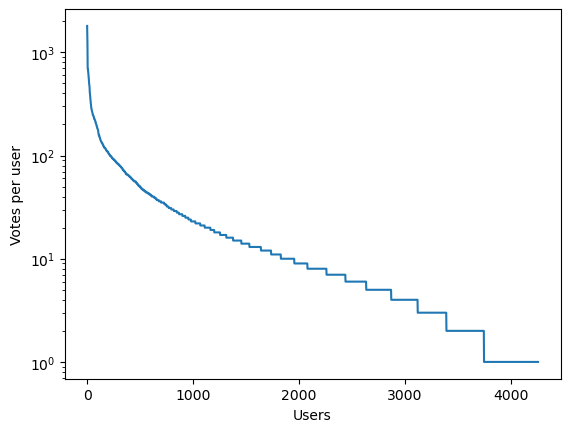

In [10]:
import matplotlib.pyplot as plt
plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).values)
plt.yscale('log')
plt.xlabel('Users')
plt.ylabel('Votes per user')

Text(0, 0.5, 'Cum. votes by those volunteers')

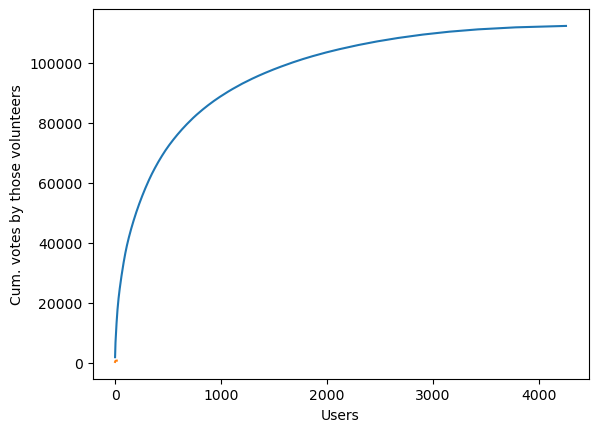

In [19]:
import matplotlib.pyplot as plt
plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).cumsum().values)
# plt.yscale('log')
plt.xlabel('Users')
plt.ylabel('Cum. votes by those volunteers')

In [17]:
expert_usernames = [
    'lauraleuzzi',
    'solfra',
    'Clarkguilty',
    'giulsp',
    'cmk24',
    'mhuertascompany',
    'gstevens',
    'marleau',
    'Berta_MB',
    'susan pyne',
    'helenecourtois',
    'gracca',
    'juliekatona',
    'MinaEnceladus',
    'LauraBisigello',
    'OliverMueller',
    'ThaiTran',
    'irisso',
    'antoniolamarca',
    'MikeWalmsley'
]
expert_usernames = [x.lower() for x in expert_usernames]
clf['expert'] = clf['user_name'].str.lower().isin(expert_usernames)
# clf['expert'].value_counts()
clf.query('expert').groupby('user_name')['classification_id'].count().sort_values(ascending=False)

user_name
solfra             224
MinaEnceladus      119
ThaiTran            91
mhuertascompany     52
OliverMueller       51
juliekatona         37
antoniolamarca      20
giulsp              17
irisso              12
lauraleuzzi         10
MikeWalmsley         6
helenecourtois       6
Berta_MB             6
cmk24                4
gstevens             3
marleau              3
clarkguilty          1
Name: classification_id, dtype: int64

Text(0, 0.5, 'Cum. votes by those astronomers')

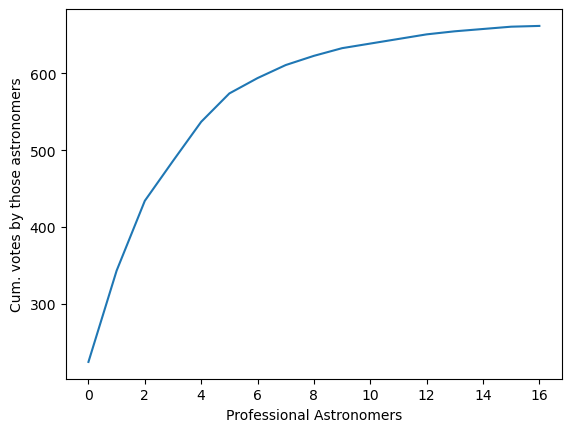

In [20]:
import matplotlib.pyplot as plt
plt.plot(clf.query('expert')['user_name'].value_counts().sort_values(ascending=False).cumsum().values)
# plt.yscale('log')
plt.xlabel('Professional Astronomers')
plt.ylabel('Cum. votes by those astronomers')
# pretty similar, maybe less extreme low count tail

In [81]:
def get_euclid_subject_id(subject_data):
    loaded = json.loads(subject_data)
    inner_dict = loaded[list(loaded.keys())[0]]
    # return inner_dict['Filename']
    return inner_dict['!filename']

In [82]:
clf['id_str'] = clf['subject_data'].apply(get_euclid_subject_id)
clf['id_str'] 

0         bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...
1         98fe3b6effab15604e484d80ef47bb7a6cb310a2c12e11...
2         18b6d8c9f5df1c44366b2a3b5ff0b1d9b3e986dd01fb73...
3         7e9871caaeccc9e709002b24f8ff097cb47516de27f609...
4         c52a8096a07e5a8af5339408267172ebcab0041a802d28...
                                ...                        
112395    36b627d60c14af0388fb5347eda3fea347a2593ed9be3e...
112396    86dc739c2752455677f52d27fd89085d3f1e98797195ea...
112397    db5a6d6d5a60c9da0aab208c571b0aa793f37e1dcf5b1d...
112398    673809c4860f2b13ea7cf89fcdba35faab81e84daab130...
112399    6f58f17184ead65920a1091d658057bd8c8ab9b7ef980a...
Name: id_str, Length: 112400, dtype: object

In [83]:
clf.columns.values

array(['classification_id', 'user_name', 'user_id', 'user_ip',
       'workflow_id', 'workflow_name', 'workflow_version', 'created_at',
       'gold_standard', 'expert', 'metadata', 'annotations',
       'subject_data', 'subject_ids', 'id_str'], dtype=object)

In [107]:
len(clf)

112400

In [84]:
# workflows = [26524]
workflows = [27100]
clf = clf[clf['workflow_id'].isin(workflows)]
assert len(clf) > 0

In [85]:
clf['created_at'] = pd.to_datetime(clf['created_at'])

In [105]:
clf_dt = clf.pivot_table(index='created_at', columns='workflow_id', values='id_str', aggfunc='count', fill_value=0)

In [122]:

clf_dt_r = clf_dt.resample('2H').sum()[27100]
clf_dt_r

created_at
2024-08-01 12:00:00+00:00     324
2024-08-01 14:00:00+00:00    3217
2024-08-01 16:00:00+00:00    3248
2024-08-01 18:00:00+00:00    3201
2024-08-01 20:00:00+00:00    3193
                             ... 
2024-08-08 02:00:00+00:00    1007
2024-08-08 04:00:00+00:00     685
2024-08-08 06:00:00+00:00     782
2024-08-08 08:00:00+00:00    1088
2024-08-08 10:00:00+00:00     767
Freq: 2H, Name: 27100, Length: 84, dtype: int64

In [150]:
clf['created_at'].max() - clf['created_at'].min()

Timedelta('6 days 23:20:27')

(0.0, 2050.35)

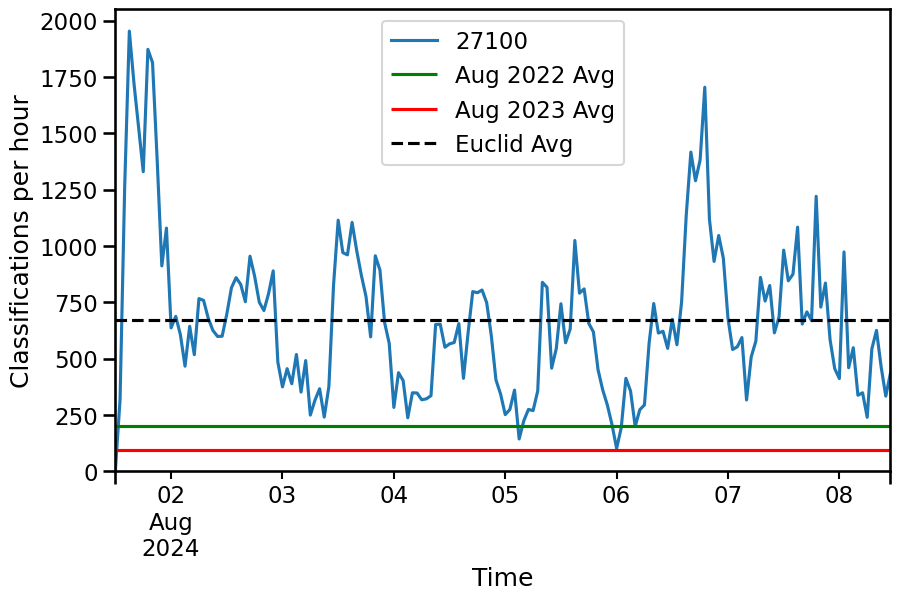

In [163]:
import seaborn as sns
sns.set_context('talk')
clf_dt_r = clf_dt.resample('1H').sum().plot(figsize=(10, 6))
# plt.plot(clf_dt_r.index, clf_dt_r.values)
plt.xlabel('Time')
plt.ylabel('Classifications per hour')
# 744 hours in august
plt.hlines(y=150000/(31*24), xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='g', label='Aug 2022 Avg')
plt.hlines(y=71000/(31*24), xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='r', label='Aug 2023 Avg')
plt.hlines(y=670, xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='k', linestyle='--', label='Euclid Avg')
# plt.legend('',frameon=False)
plt.legend()
# plt.axvline(pd.to_datetime('2024-08-01 13:00:00'), color='r', linestyle='--')
# plt.axvline(pd.to_datetime('2024-08-01 19:00:00'), color='r', linestyle='--')
plt.ylim([0, None])

In [146]:
len(clf)/(7*24)

669.047619047619

In [86]:
# clf['time_since_start'] = clf['created_at'] - clf['created_at'].min()

In [87]:
import numpy as np

In [97]:
# clf['days_since_start'] = np.around(clf['time_since_start'].dt.total_seconds() / (24*3600), 1)

In [98]:
# clf_grouped = clf.groupby('days_since_start').agg({'user_name': 'count'}).reset_index()

In [99]:
import matplotlib.pyplot as plt

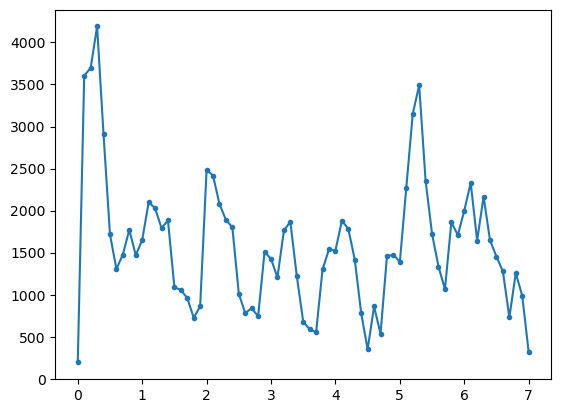

In [102]:
plt.plot(clf_grouped['days_since_start'], clf_grouped['user_name'], marker='.')

In [ ]:
# clf['created_at_date'] = clf['created_at'].apply(lambda x: x.split(' ')[0])
# clf.groupby('created_at_date').agg({'created_at': 'count'})

# clf['created_at_hour'] = clf['created_at'].apply(lambda x: x.split(':')[0])
# clf.groupby('created_at_hour').agg({'created_at': 'count'})

,created_at
created_at_hour,
2024-08-01 12,6
2024-08-01 13,318
2024-08-01 14,1264
2024-08-01 15,1953
2024-08-01 16,1721
...,...
2024-08-08 07,543
2024-08-08 08,625
2024-08-08 09,463


In [ ]:
df = export_to_responses.explode_annotations(clf, exclude_tasks=['T10'])
df

,task,task_label,value,id_str,user_id,classification_id,created_at,subject_ids,workflow_version
0,T0,"Is the galaxy simply smooth and rounded, with ...",![features_or_disk_new.png](https://panoptes-u...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475.0,575637319,2024-08-01 12:31:20 UTC,101103135,1.1
0,T2,Could this be a disk viewed edge-on?,![feature_or_disk.png](https://panoptes-upload...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475.0,575637319,2024-08-01 12:31:20 UTC,101103135,1.1
0,T4,Is there a bar feature through the centre of t...,![bar_strong_sidebyside_acwacw_200x100.png](ht...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475.0,575637319,2024-08-01 12:31:20 UTC,101103135,1.1
0,T5,Is there any sign of a spiral arm pattern?,![rounded.png](https://panoptes-uploads.zooniv...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475.0,575637319,2024-08-01 12:31:20 UTC,101103135,1.1
0,T8,"Is there a central bulge? If so, how large is ...",![bulge_icon_moderate_bulge.png](https://panop...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475.0,575637319,2024-08-01 12:31:20 UTC,101103135,1.1
...,...,...,...,...,...,...,...,...,...
112399,T6,How tightly wound do the spiral arms appear?,![loose_arms.png](https://panoptes-uploads.zoo...,6f58f17184ead65920a1091d658057bd8c8ab9b7ef980a...,2760215.0,576670173,2024-08-08 11:51:47 UTC,101103424,1.1
112399,T7,How many spiral arms are there?,![2_arms.png](https://panoptes-uploads.zoonive...,6f58f17184ead65920a1091d658057bd8c8ab9b7ef980a...,2760215.0,576670173,2024-08-08 11:51:47 UTC,101103424,1.1
112399,T8,"Is there a central bulge? If so, how large is ...",![bulge_icon_moderate_bulge.png](https://panop...,6f58f17184ead65920a1091d658057bd8c8ab9b7ef980a...,2760215.0,576670173,2024-08-08 11:51:47 UTC,101103424,1.1
112399,T13,Are there any obvious bright clumps?,![no.png](https://panoptes-uploads.zooniverse....,6f58f17184ead65920a1091d658057bd8c8ab9b7ef980a...,2760215.0,576670173,2024-08-08 11:51:47 UTC,101103424,1.1


In [ ]:
question = schema.get_question_from_raw_name('T0')
# question.get_answer_names()
question.get_raw_answer_names()

['smooth', 'features or disk', 'star, artifact, or bad zoom']

In [ ]:
cleaned = export_to_responses.clean_exploded_annotations(df, schema)

In [ ]:
len(cleaned)

551945

In [ ]:
aggregated = aggregate.responses_to_reduced_votes(cleaned.reset_index(drop=True), schema)

/home/walml/repos/gz-panoptes-reduction/gzreduction/vote_sources/panoptes_exports/aggregate.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[question.get_fraction_column(answer)] = df[question.get_count_column(answer)] / df[question.total_votes]  # may give nans?
/home/walml/repos/gz-panoptes-reduction/gzreduction/vote_sources/panoptes_exports/aggregate.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[question.get_fraction_column(answer)] = df[question.get_count_column(answer)] / df[question.total_votes]  # may giv

In [ ]:
aggregated

question_response,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,problem_artifact_fraction,problem_zoom_fraction,artifact_non-star_fraction,artifact_satellite_fraction,artifact_scattered_fraction,artifact_diffraction_fraction,artifact_ray_fraction,artifact_saturation_fraction,artifact_other_fraction,artifact_ghost_fraction
0,0000a505e575fb99b9f1357a61eb7fa85a6358fba4e60f...,2,2,0,2,0,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003e45d0d5924be1922667709930b5fe0229ace6e7772...,4,1,0,1,3,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00052671ff70566ca8fb23821a29efa5b3d9370b082bb9...,0,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000b0a6aa76fc732120a4405c2f2ccf8b4539fee63d66f...,5,0,0,0,2,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000b6906d8a24dcf4142d5332aeae50d9524c419068449...,0,5,0,0,0,0,4,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,fffbb0a27f63fb5e91969fbefecde97400fea81f618456...,1,4,0,0,1,0,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32519,fffbe9725d651ad0eb265934afee7301d3c3d85a7e6d25...,2,0,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32520,fffd74d45a669c041b9159b29141b50f75dbf9c4af0260...,5,0,0,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32521,fffe5be14688312bb37c33083b5c558fab29e043a6cb1a...,0,5,0,0,0,0,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# merge in subject id

aggregated = aggregated.merge(clf[['id_str', 'subject_ids']].drop_duplicates(), on='id_str', how='left')
aggregated = aggregated.rename(columns={'subject_ids': 'subject_id'})

In [ ]:
aggregated

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,problem_zoom_fraction,artifact_non-star_fraction,artifact_satellite_fraction,artifact_scattered_fraction,artifact_diffraction_fraction,artifact_ray_fraction,artifact_saturation_fraction,artifact_other_fraction,artifact_ghost_fraction,subject_id
0,0000a505e575fb99b9f1357a61eb7fa85a6358fba4e60f...,2,2,0,2,0,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101084770
1,0003e45d0d5924be1922667709930b5fe0229ace6e7772...,4,1,0,1,3,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101098031
2,00052671ff70566ca8fb23821a29efa5b3d9370b082bb9...,0,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101126925
3,000b0a6aa76fc732120a4405c2f2ccf8b4539fee63d66f...,5,0,0,0,2,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101097775
4,000b6906d8a24dcf4142d5332aeae50d9524c419068449...,0,5,0,0,0,0,4,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101095658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,fffbb0a27f63fb5e91969fbefecde97400fea81f618456...,1,4,0,0,1,0,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101096528
32519,fffbe9725d651ad0eb265934afee7301d3c3d85a7e6d25...,2,0,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101114759
32520,fffd74d45a669c041b9159b29141b50f75dbf9c4af0260...,5,0,0,5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101090409
32521,fffe5be14688312bb37c33083b5c558fab29e043a6cb1a...,0,5,0,0,0,0,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101084827


In [ ]:
aggregated.to_csv(aggregated_loc, index=False)

In [161]:
aggregated['smooth-or-featured_total-votes']

0        4
1        5
2        1
3        5
4        5
        ..
32518    5
32519    2
32520    5
32521    5
32522    5
Name: smooth-or-featured_total-votes, Length: 32523, dtype: int64

Text(0, 0.5, 'Galaxies')

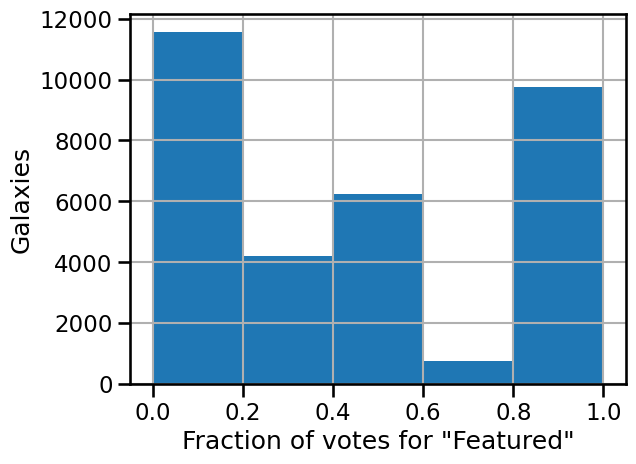

In [160]:
aggregated['smooth-or-featured_featured-or-disk_fraction'].hist(bins=5)
plt.xlabel('Fraction of votes for "Featured"')
plt.ylabel('Galaxies')